In [80]:
import matplotlib.pyplot as plt
import numpy as np
import yaml

from floris.tools import FlorisInterface
from floris.tools.visualization import visualize_cut_plane
from floris.tools.visualization import plot_rotor_values

In [16]:
# Instantiate FLORIS with the GCH model
with open('floris_examples/inputs/gch.yaml', 'r') as file:
    input_dict_gch = yaml.safe_load(file)
    solver_dict_gch = input_dict_gch["solver"]

In [17]:
# Instantiate FLORIS with the CC model
with open('floris_examples/inputs/cc.yaml', 'r') as file:
    input_dict_cc = yaml.safe_load(file)
    solver_dict_cc = input_dict_cc["solver"]

In [192]:
# Set up a 4-turbine wind farm with some partial overlap
D = 126.
#spacing = 3.5
# spacing = 5
spacing = 3
layout_x = np.array([0, D*1*spacing, D*2*spacing, D*3*spacing])
layout_y = [0, 0, 0.5 * D, -0.5 * D]
layout_y = np.array(layout_y)

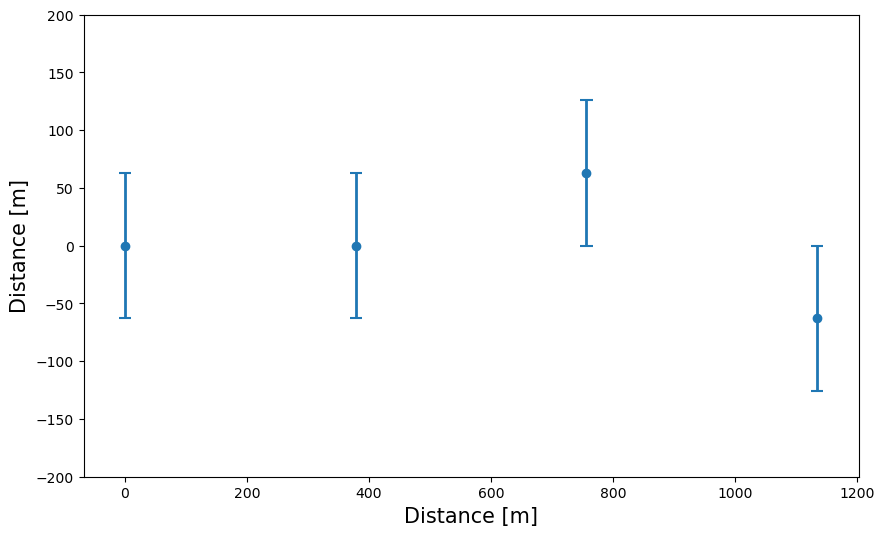

In [225]:
fntsze = 15

fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.scatter(layout_x, layout_y)

fig = plt.gcf()
ax = fig.gca()

# for i in range(len(layout_x)):
#     circ = plt.Circle((layout_x[i], layout_y[i]), D, fill=False)
#     ax.add_patch(circ)

ax.vlines(x=layout_x, ymin = layout_y-D/2, ymax = layout_y + D/2, linewidth = 2)

for i in range(len(layout_x)):
    ax.hlines(y=layout_y[i]+D/2, xmin=layout_x[i]-10, xmax=layout_x[i]+10)
    ax.hlines(y=layout_y[i]-D/2, xmin=layout_x[i]-10, xmax=layout_x[i]+10)
#plt.axis("equal")
plt.xlabel("Distance [m]", fontsize=fntsze)
plt.ylabel("Distance [m]", fontsize = fntsze)
plt.ylim([-200, 200])
plt.show()
fig.savefig('Plots/Appendix_1/farmlayout.png', dpi=150)

In [61]:
grid_points_array = range(2, 40)

farm_power_array_gch = np.zeros(len(grid_points_array))
farm_power_array_cc = np.zeros(len(grid_points_array))

for ii, no_rotor_points in enumerate(grid_points_array):
    print("Evaluating FLORIS with {} grid points.".format(no_rotor_points))
    
    # Update number of rotor points
    solver_dict_gch["turbine_grid_points"] = no_rotor_points
    solver_dict_cc["turbine_grid_points"] = no_rotor_points

    fi_gch = FlorisInterface(input_dict_gch)
    fi_cc = FlorisInterface(input_dict_cc)

    fi_gch.reinitialize(layout = [layout_x, layout_y], wind_speeds=[8.0])
    fi_cc.reinitialize(layout = [layout_x, layout_y], wind_speeds=[8.0])

    # Calculate wind farm power
    fi_gch.calculate_wake()
    fi_cc.calculate_wake()
    farm_power_array_gch[ii] = fi_gch.get_farm_power()[0][0]
    farm_power_array_cc[ii] = fi_cc.get_farm_power()[0][0]

Evaluating FLORIS with 2 grid points.
Evaluating FLORIS with 3 grid points.
Evaluating FLORIS with 4 grid points.
Evaluating FLORIS with 5 grid points.
Evaluating FLORIS with 6 grid points.
Evaluating FLORIS with 7 grid points.
Evaluating FLORIS with 8 grid points.
Evaluating FLORIS with 9 grid points.
Evaluating FLORIS with 10 grid points.
Evaluating FLORIS with 11 grid points.
Evaluating FLORIS with 12 grid points.
Evaluating FLORIS with 13 grid points.
Evaluating FLORIS with 14 grid points.
Evaluating FLORIS with 15 grid points.
Evaluating FLORIS with 16 grid points.
Evaluating FLORIS with 17 grid points.
Evaluating FLORIS with 18 grid points.
Evaluating FLORIS with 19 grid points.
Evaluating FLORIS with 20 grid points.
Evaluating FLORIS with 21 grid points.
Evaluating FLORIS with 22 grid points.
Evaluating FLORIS with 23 grid points.
Evaluating FLORIS with 24 grid points.
Evaluating FLORIS with 25 grid points.
Evaluating FLORIS with 26 grid points.
Evaluating FLORIS with 27 grid po

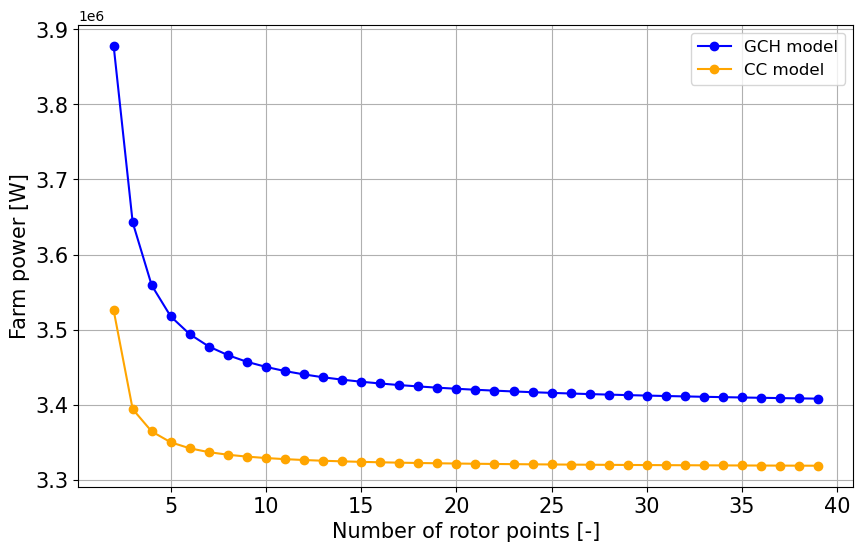

In [234]:
# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(grid_points_array, farm_power_array_gch, '-o', c="b", label="GCH model")
# ax.plot([0, grid_points_array[-1]], 2 * [farm_power_array_gch[-1]], '--', c="b")
# ax.plot([0, grid_points_array[1]], 2 * [farm_power_array_gch[1]], '--', c="b")

ax.plot(grid_points_array, farm_power_array_cc, '-o', c="orange", label="CC model")
# ax.plot([0, grid_points_array[-1]], 2 * [farm_power_array_cc[-1]], '--', c="orange")
# ax.plot([0, grid_points_array[1]], 2 * [farm_power_array_cc[1]], '--', c="orange")

ax.grid(True)
ax.legend(fontsize=12)
ax.set_xlabel('Number of rotor points [-]', fontsize = fntsze)
ax.set_ylabel('Farm power [W]', fontsize = fntsze)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
fig.savefig('Plots/Appendix_1/power.png', dpi=150)


In [67]:
farm_power_array_gch[-1], farm_power_array_cc[-1]

(3408180.1688943766, 3318918.0066850334)

In [246]:
pct_inc_gch.shape, grid_points_array[-1]

((38,), 39)

In [240]:
x_vals

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])

In [249]:
pct_inc_gch = []
pct_inc_cc = []
for i in range(len(farm_power_array_gch)):
    # y_gch = abs(farm_power_array_gch[i+1] - farm_power_array_gch[i])
    # y_cc = abs(farm_power_array_cc[i+1] - farm_power_array_cc[i])

    y_gch = farm_power_array_gch[i] - farm_power_array_gch[-1]
    y_cc = farm_power_array_cc[i] - farm_power_array_cc[-1]

    # pct_inc_gch.append(y_gch/((farm_power_array_gch[i+1] + farm_power_array_gch[i])/2)*100)
    # pct_inc_cc.append(y_cc/((farm_power_array_cc[i+1] + farm_power_array_cc[i])/2)*100)

    pct_inc_gch.append(y_gch/(farm_power_array_gch[-1])*100)
    pct_inc_cc.append(y_cc/(farm_power_array_cc[-1])*100)
    
pct_inc_gch = np.array(pct_inc_gch)
pct_inc_cc = np.array(pct_inc_cc)

y_want = 2  #Percentage difference we want to be under.

index_gch = next(i for i, v in enumerate(abs(pct_inc_gch)) if v < y_want) #finds the fist index that is under that specific value.
index_cc = next(i for i, v in enumerate(abs(pct_inc_cc)) if v < y_want) #finds the fist index that is under that specific value.

x_vals = np.arange(2,40,1)   #create x values for axis

y_1_gch = abs(pct_inc_gch[index_gch])       #Find the y value
y_1_cc = abs(pct_inc_cc[index_cc])          #Find the y value

x_1_gch = x_vals[index_gch]
x_1_cc = x_vals[index_cc]


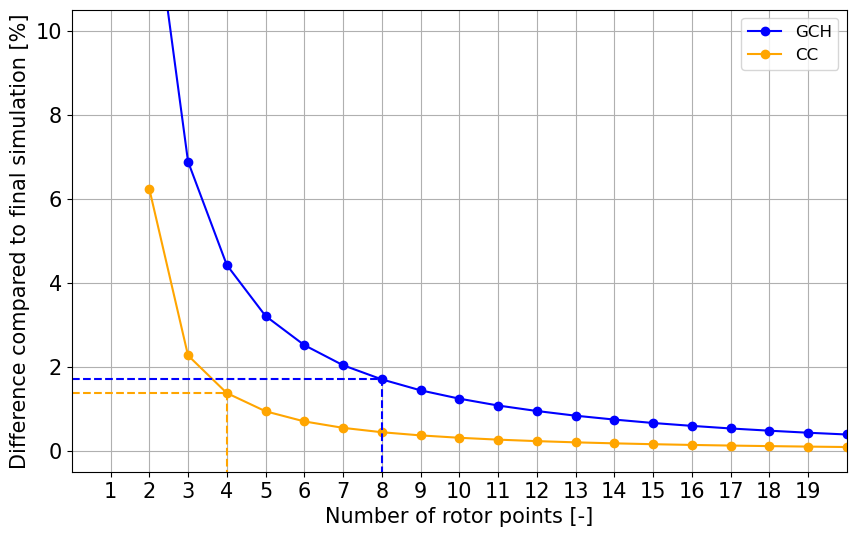

Number of grid points needed to be under 2% difference for GCH: 8
Number of grid points needed to be under 2% difference for CC: 4


In [252]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.plot(range(2,40),abs(pct_inc_gch),'o-', c="b", label="GCH")
plt.plot(range(2,40),abs(pct_inc_cc),'o-', c="orange", label = "CC")

plt.xlabel("Number of rotor points [-]", fontsize = fntsze)
plt.ylabel("Difference compared to final simulation [%]", fontsize = fntsze)
plt.grid()

plt.ylim([-0.5, 10.5])
plt.xlim([0, 20])
plt.legend(fontsize=12)

xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([xlim[0], x_1_gch, x_1_gch],[y_1_gch, y_1_gch, ylim[0]],'--', c="b")
plt.plot([xlim[0], x_1_cc, x_1_cc],[y_1_cc, y_1_cc, ylim[0]],'--', c="orange")
plt.xticks(np.arange(1,20), fontsize=15)
plt.yticks(fontsize=15)

plt.show()
fig.savefig('Plots/Appendix_1/convergence.png', dpi=150)

print("Number of grid points needed to be under 2% difference for GCH:", x_1_gch)
print("Number of grid points needed to be under 2% difference for CC:", x_1_cc)



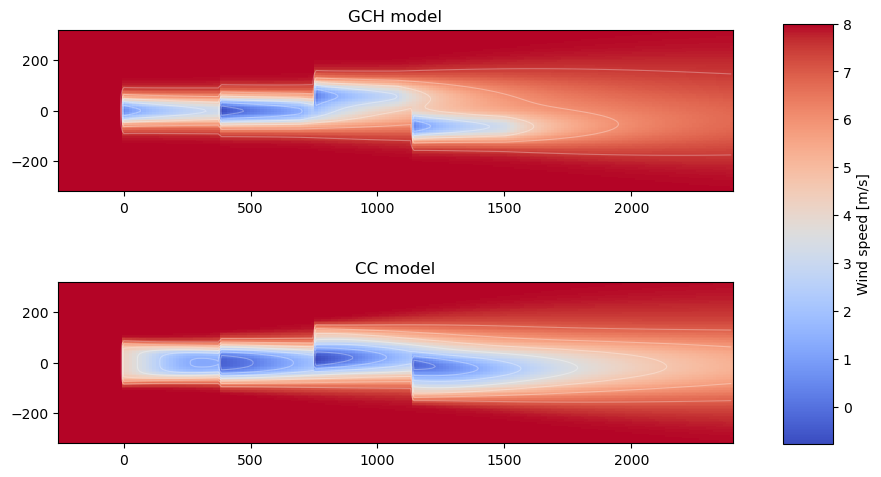

In [133]:
# Using the FlorisInterface functions, get 2D slices.
horizontal_plane_gch = fi_gch.calculate_horizontal_plane(x_resolution=200, y_resolution=100, height=90.0)
horizontal_plane_cc = fi_cc.calculate_horizontal_plane(x_resolution=200, y_resolution=100, height=90.0, )




# Create the plots
fig, ax_list = plt.subplots(2, 1, figsize=(10, 8))
ax_list = ax_list.flatten()
fig.set_size_inches(10,6)
test1 = visualize_cut_plane(horizontal_plane_gch, ax=ax_list[0], title="GCH model")
visualize_cut_plane(horizontal_plane_cc, ax=ax_list[1], title="CC model")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(test1, cax=cbar_ax)
cbar.set_label('Wind speed [m/s]')

plt.show()
fig.savefig('Plots/Appendix_1/flowfield.png', dpi=150)

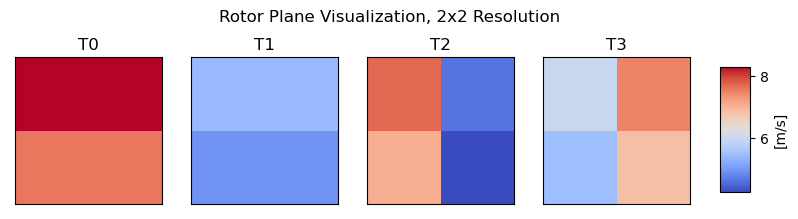

In [217]:
n_grid = 2
# Increase the resolution of points on each turbien plane
solver_settings = {
  "type": "turbine_grid",
  "turbine_grid_points": n_grid
}
fi_gch.reinitialize(solver_settings=solver_settings)

# Run the wake calculation to get the turbine-turbine interfactions on the turbine grids
fi_gch.calculate_wake()

# Plot the values at each rotor
fig, axes,cbar_ax, cb = plot_rotor_values(fi_gch.floris.flow_field.u, wd_index=0, ws_index=0, n_rows=1, n_cols=4, return_fig_objects=True)

fig.suptitle("Rotor Plane Visualization, " + str(n_grid) + "x" + str(n_grid) + " Resolution" )
fig.set_size_inches(10,2.5)
cb.set_label("[m/s]")


plt.show()
fig.savefig('Plots/Appendix_1/rotorplane_2.png', dpi=150)

